<a href="https://colab.research.google.com/gist/SoKawai1/5bc0a050453c32ad204ff14788c3539c/danbooru_images_parsing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Парсинг картинок с форума "**Danbooru"**

Источники:
*   Источник картинок [**сайт "Danbooru**"](https://danbooru.donmai.us/posts)
---
Дата: **29.11.24**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import files
import tensorflow as tf
from io import BytesIO
from PIL import Image
import pandas as pd
import numpy as np
import kagglehub
import requests
import cv2
import os


In [ ]:
API_KEY = '30261812'

url = "https://testbooru.donmai.us/profile.json?api_key=bKaZVwBxg5CrkGZuEe1i4SHF&login=SoKawaii"

In [ ]:
API_KEY = 'bKaZVwBxg5CrkGZuEe1i4SHF'

url = "https://danbooru.donmai.us/posts.json?tags=portrait"

response = requests.get(url)
data = response.json()

#Принт первых 5 постов с тэгом #portrait
if response.status_code == 200:
    data = response.json()
    for post in data[:5]:
        print(post['file_url'])
else:
    print(f"Ошибка {response.status_code}")

https://cdn.donmai.us/original/80/1e/801ea093b3cadf8ffd1989d150493015.png
https://cdn.donmai.us/original/51/02/5102a817465ef4316f9479349bbd21ef.png
https://cdn.donmai.us/original/e1/95/e1958c8f27719b7dc2a30098f9f93b62.jpg
https://cdn.donmai.us/original/58/85/588573769f633b2ba937fcd379e224ec.png
https://cdn.donmai.us/original/63/04/6304a69d49033a76c65ca1ae6a09a732.jpg


In [ ]:
parsed_image = []
def get_image(image_id):
    # ID картинки
    image_id = str(image_id)
    # URL для запроса по ID картинки
    url = f"https://danbooru.donmai.us/posts/{image_id}.json"
    # Отправка запроса
    response = requests.get(url)

    if response.status_code == 200:
        post_data = response.json()

        # Получение URL картинки
        image_url = post_data['file_url']
        print("Image URL:", image_url)

        # Загрузка изображения по URL
        img_response = requests.get(image_url)

        if img_response.status_code == 200:
            # Открываем изображение
            img = Image.open(BytesIO(img_response.content))
            parsed_image.append(np.array(img))
            # Показ изображения
            plt.imshow(img)
            plt.axis('off')  # Отключить оси
            plt.show()
        else:
            print("Ошибка при загрузке изображения.")
    else:
        print(f"Ошибка {response.status_code}: не удалось загрузить данные по ID {image_id}")


Image URL: https://cdn.donmai.us/original/58/14/581481929e0abb9a4287803b94ec2c35.jpg


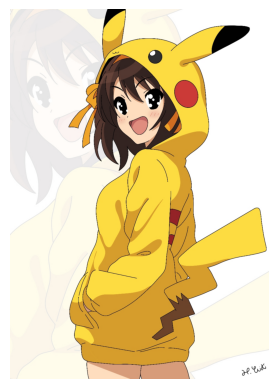

In [ ]:
#get_image(8496982)



---

